In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance1/insurance.csv


In [2]:
dataset= pd.read_csv('/kaggle/input/insurance1/insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Import libraries for data preprocessing**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
dataset.select_dtypes(include = 'object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [8]:
len(dataset.select_dtypes(include = 'object').columns)

3

In [9]:
dataset.select_dtypes(include = ['float64','int64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [10]:
len(dataset.select_dtypes(include = ['float64','int64']).columns)

4

**check missing values**

In [11]:
dataset.isnull().values.any()

False

In [12]:
dataset.isnull().values.sum()

0

**Handling Categorical values using one hot encoding**

In [13]:
dataset.select_dtypes(include = 'object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [14]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [15]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [16]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
dataset = pd.get_dummies(dataset, drop_first = True)
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


**Check correlation**

In [18]:
dataset2 = dataset.drop('charges', axis = 'columns')
dataset2.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


<Axes: title={'center': 'Correlation of features with charges'}>

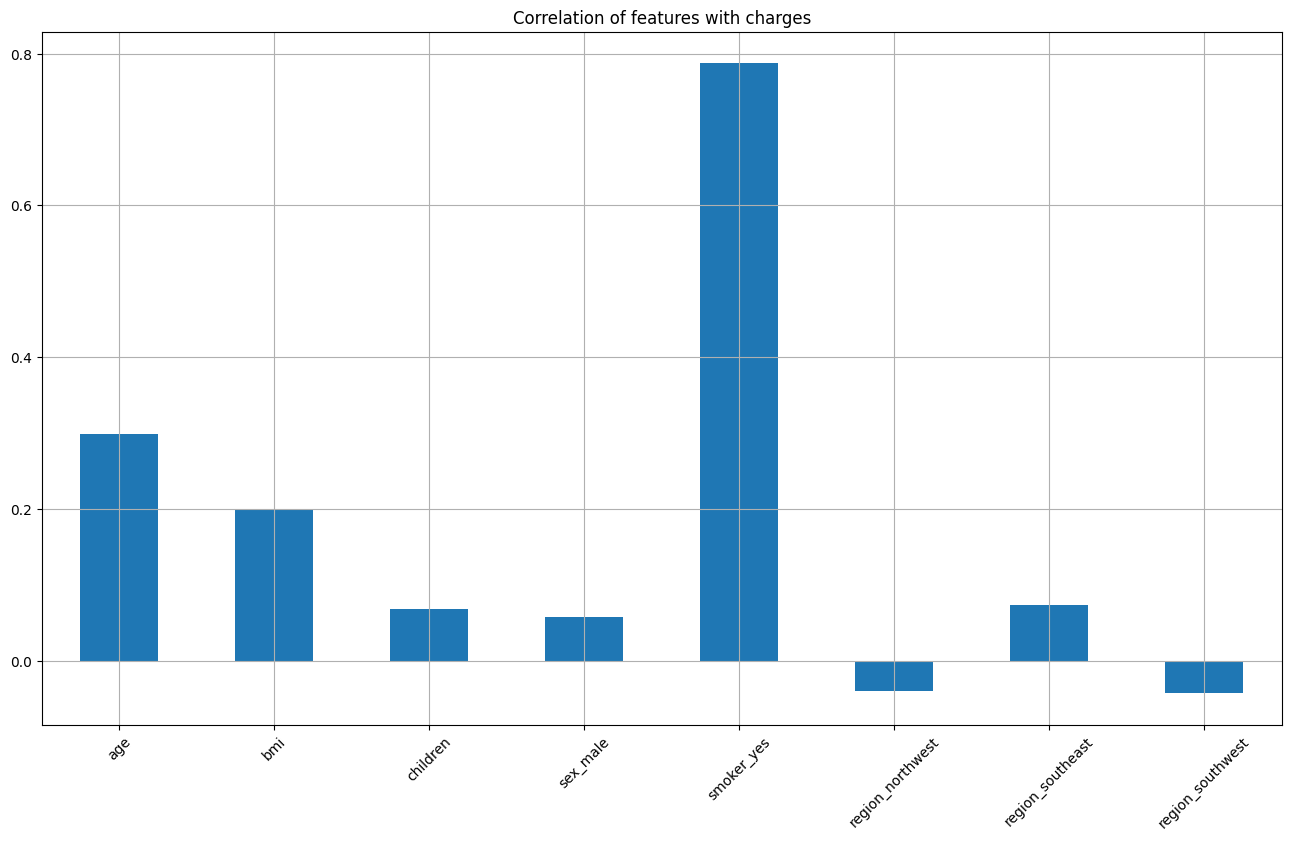

In [19]:
dataset2.corrwith(dataset['charges']).plot.bar(figsize = (16,9), title ='Correlation of features with charges',rot = 45, grid = True)

**Heatmap of the correlation**

In [20]:
cor = dataset.corr()

<Axes: >

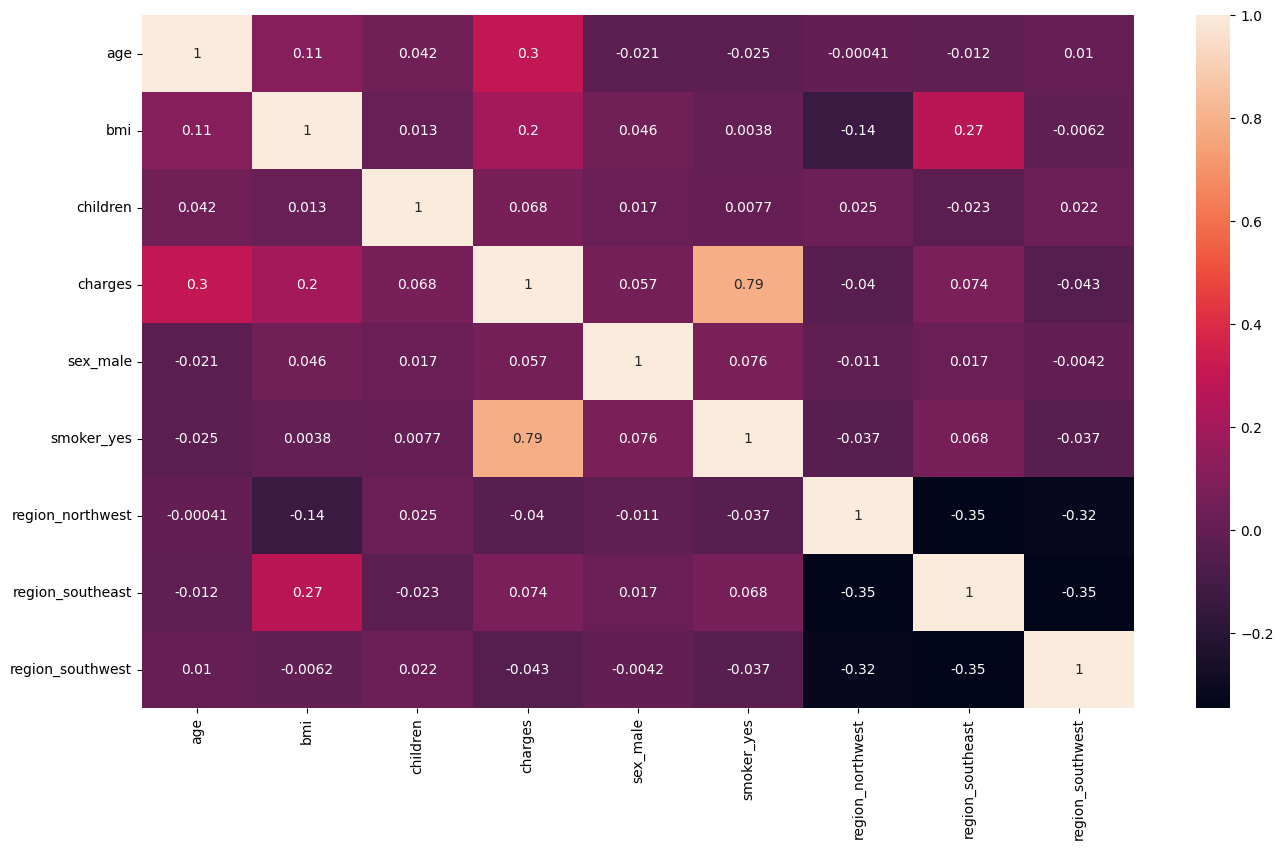

In [21]:
plt.figure(figsize = (16,9))
sns.heatmap(cor, annot = True)

**Split the dataset in train and test set**

In [22]:
X = dataset.drop('charges', axis = 'columns')
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [23]:
y = dataset['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

**Model Creation**

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1046,43,25.080,0,False,False,False,False,False
682,39,35.300,2,True,True,False,False,True
1037,45,30.495,1,False,True,True,False,False
490,19,32.900,0,False,False,False,False,True
39,60,39.900,0,True,True,False,False,True


In [26]:
X_train.shape

(896, 8)

In [27]:
X_test.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
764,45,25.175,2,False,False,False,False,False
887,36,30.020,0,False,False,True,False,False
890,64,26.885,0,False,True,True,False,False
1293,46,25.745,3,True,False,True,False,False
259,19,31.920,0,True,True,True,False,False


In [28]:
X_test.shape

(442, 8)

**Apply Scaling on features**

In [29]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [30]:
X_train

array([[ 0.26510612, -0.91337479, -0.9126072 , ..., -0.58078691,
        -0.58594226, -0.55500378],
       [-0.01650038,  0.79545635,  0.74768935, ..., -0.58078691,
        -0.58594226,  1.80178953],
       [ 0.40590937, -0.00796181, -0.08245892, ...,  1.7218019 ,
        -0.58594226, -0.55500378],
       ...,
       [ 1.32113048, -0.89749036, -0.9126072 , ..., -0.58078691,
        -0.58594226, -0.55500378],
       [-0.15730363,  2.85207309,  0.74768935, ..., -0.58078691,
        -0.58594226,  1.80178953],
       [ 1.10992561, -0.10744856, -0.9126072 , ..., -0.58078691,
        -0.58594226,  1.80178953]])

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linreg = LinearRegression()

In [32]:
linreg.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred = linreg.predict(X_test)

In [34]:
score = linreg.score(X_test,y_test)
score

0.7605492639270064

**Models Evaluations**

In [35]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

MSE: 35090225.72562568, MAE: 4193.463021932155, R2: 0.7605492639270064


In [36]:
from sklearn.linear_model import Ridge
clf = Ridge().fit(X_train, y_train)
clf_y_pred = clf.predict(X_test)
clf_y_pred

array([ 8.82987571e+03,  7.07599171e+03,  3.69781210e+04,  9.44408928e+03,
        2.70890699e+04,  1.10501218e+04,  3.27014385e+01,  1.72467243e+04,
        9.10995859e+02,  1.12488700e+04,  2.80089531e+04,  9.44561424e+03,
        4.92609080e+03,  3.83308182e+04,  4.03768653e+04,  3.70379270e+04,
        1.50613554e+04,  3.57432624e+04,  8.83353957e+03,  3.14917394e+04,
        3.59933365e+03,  1.02024096e+04,  2.42568765e+03,  7.14925939e+03,
        1.11906312e+04,  1.30392697e+04,  1.46447736e+04,  5.97219793e+03,
        9.84642630e+03,  1.99291001e+03,  8.89651892e+03,  1.31881549e+04,
        4.29465857e+03,  3.13302106e+03,  4.48772723e+03,  1.32800334e+04,
        1.81146991e+03,  8.77253459e+03,  3.32598286e+04,  3.24955518e+04,
        3.53937500e+03,  4.37330905e+03,  1.42143569e+04,  1.16258440e+04,
        8.60054992e+03,  1.22424507e+04,  5.15255684e+03,  2.87228502e+03,
        3.53351457e+04,  8.99330787e+03,  1.57631933e+04,  2.09787918e+03,
        1.24452442e+04,  

In [37]:
mse = mean_squared_error(y_test, clf_y_pred)
mae = mean_absolute_error(y_test, clf_y_pred)
r2 = r2_score(y_test, clf_y_pred)

print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

MSE: 35091766.23017514, MAE: 4194.962847609943, R2: 0.7605387517418989


In [38]:
from sklearn.ensemble import RandomForestRegressor
# Initialize and train the RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test)

In [40]:
# Evaluate the performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regressor - MSE: {mse_rf}, MAE: {mae_rf}, R2: {r2_rf}')

Random Forest Regressor - MSE: 22987619.25385597, MAE: 2707.7275307013583, R2: 0.8431357383123991


In [41]:
from xgboost import XGBRFRegressor

In [42]:
# Initialize and train the XGBRFRegressor
xgbrf_regressor = XGBRFRegressor()
xgbrf_regressor.fit(X_train, y_train)


XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [43]:
# Predict on the test set
y_pred_xgbrf = xgbrf_regressor.predict(X_test)

In [44]:
# Evaluate the performance
mse_xgbrf = mean_squared_error(y_test, y_pred_xgbrf)
mae_xgbrf = mean_absolute_error(y_test, y_pred_xgbrf)
r2_xgbrf = r2_score(y_test, y_pred_xgbrf)

print(f'XGBRF Regressor - MSE: {mse_xgbrf}, MAE: {mae_xgbrf}, R2: {r2_xgbrf}')

XGBRF Regressor - MSE: 19875534.528893653, MAE: 2519.655235177761, R2: 0.8643721642032006


**Let's Check Actcual Prediction**

In [45]:
test = [19,27.900,0,False,True,False,False,True]

In [46]:
test = ss.fit_transform([test])

In [47]:
xgbrf_regressor.predict(test)

array([7017.718], dtype=float32)